# Regression Case Study

**PROBLEM STATEMENT** 
There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

**Read the data**

In [2]:
cars=pd.read_csv('Cars.csv')

In [3]:
cars.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Colour                object
Seats                float64
No. of Doors         float64
New_Price             object
Price                float64
dtype: object

**Check the Head**

In [4]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [5]:
#cars =cars[cars['Year'] >= 2000] - remove older data if resale of vehicles of tht year not allowed anymore

**Get the info**

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


**Get the Summary Statistics**

In [7]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5961,212,Maruti Swift,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5950,11,Mumbai,781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5959.0,NaN,NaN,NaN,2013.389159,3.243051,1998.0,2011.5,2014.0,2016.0,2019.0
Kilometers_Driven,5953.0,NaN,NaN,NaN,58711.100118,91712.207172,171.0,33931.0,53000.0,73000.0,6500000.0
Fuel_Type,5961,5,Diesel,3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5934,2,Manual,4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5946,4,First,4875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5959,439,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5944,143,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5929,369,74 bhp,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for Null Values**

In [8]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

**% Null values**

In [9]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

Name                  0.000000
Location              0.208808
Year                  0.037965
Kilometers_Driven     0.151860
Fuel_Type             0.000000
Transmission          0.512528
Owner_Type            0.284738
Mileage               0.037965
Engine                0.322703
Power                 0.607441
Colour                0.208808
Seats                 0.094913
No. of Doors          0.018983
New_Price            97.513288
Price                 0.000000
dtype: float64

**Since New_Price has over 97% Null values, we would drop this column for now**

In [10]:
cars=cars.drop('New_Price',axis=1)

In [11]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


**Check for Duplicates**

In [12]:
cars.duplicated().sum()

2

In [13]:
cars.drop_duplicates(inplace=True)

**Check for Object Data Type**

In [14]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Toyota Innova,Delhi,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others


- It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype

In [15]:
cars['Mileage'] = cars['Mileage'].str.replace(',','').str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [16]:
cars['Engine'] = cars['Engine'].str.replace(',','').str.replace('CC','').astype('float')

In [17]:
cars['Power'] = cars['Power'].replace('null bhp', 0)
cars['Power'] = cars['Power'].str.replace(',','').str.replace('bhp','').astype('float')

In [18]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Create a new column 'Brand' which has the brand name of the Cars**

In [19]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [20]:
cars.Brand.value_counts()

Maruti           1187
Hyundai          1100
Honda             601
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Smart               1
Lamborghini         1
Bentley             1
Name: Brand, dtype: int64

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [21]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

**Create a new column 'Model' which has the Model name of the Cars**

In [22]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [23]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

1                     3
1000                  1
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               106
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia           

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format.

In [24]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

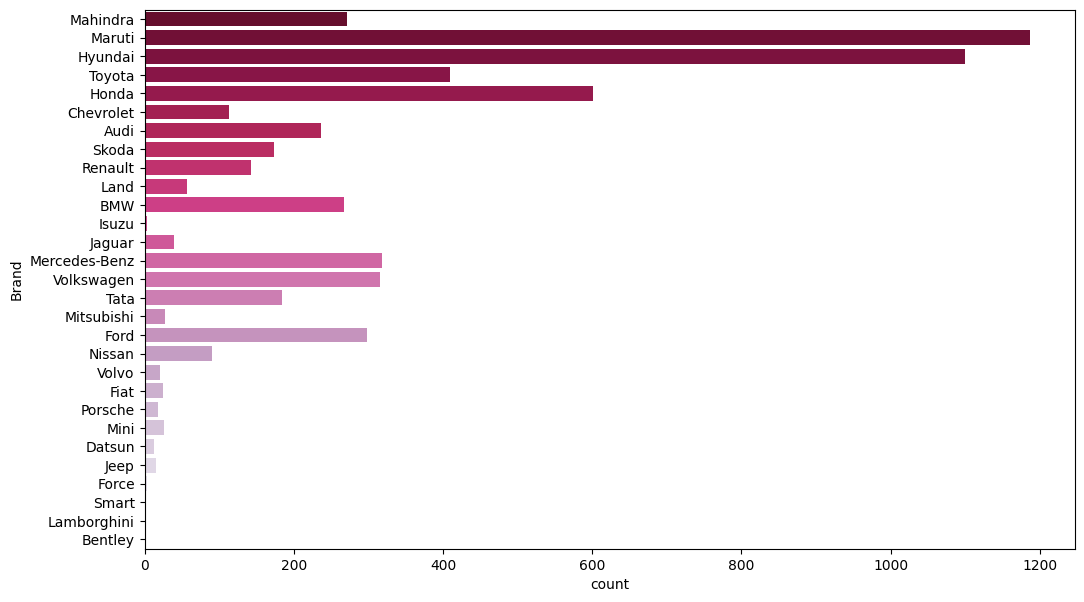

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(y=(cars.Brand),palette='PuRd_r');

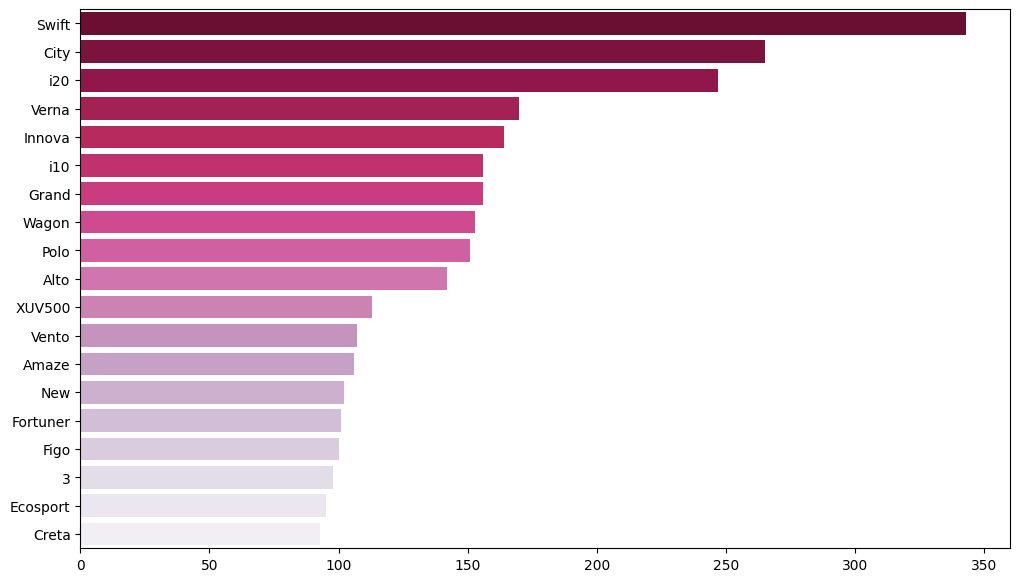

In [26]:
plt.figure(figsize=(12,7))
sns.barplot(y=cars.Model.value_counts()[cars.Model.value_counts()>90].index,
            x=cars.Model.value_counts()[cars.Model.value_counts()>90].values,palette='PuRd_r');

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


In [27]:
cars[cars['Model']=='New'].head(2) # so it is a Mercedes Benz

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
71,Mercedes-Benz New,Hyderabad,2012.0,86000.0,Diesel,Automatic,First,14.84,2143.0,170.0,White,5.0,4.0,19.0,Mercedes-Benz,New
279,Mercedes-Benz New,Jaipur,2009.0,116000.0,Diesel,Manual,Second,15.80,2148.0,170.0,White,5.0,4.0,8.5,Mercedes-Benz,New


In [28]:
cars[cars['Model']=='3'].head(2) # so it is a BMW

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.0,Others,5.0,4.0,26.5,BMW,3
35,BMW 3,Chennai,2009.0,137000.0,Diesel,Automatic,Second,13.20,1995.0,170.0,Others,5.0,4.0,9.0,BMW,3


**Bin the cars as per average Price of the Brand**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [29]:
cars.Price.describe()

count    5959.000000
mean        9.529916
std        11.215743
min         0.440000
25%         3.500000
50%         5.660000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [30]:
#Binning the Car Companies based on avg prices of each car Company.
cars['Price'] = cars['Price'].astype('int')
cars_2 = cars.copy()
t = cars_2.groupby(['Brand'])['Price'].mean()
t

Brand
Audi              25.131356
BMW               24.823970
Bentley           59.000000
Chevrolet          2.451327
Datsun             2.538462
Fiat               2.800000
Force              9.333333
Ford               6.429530
Honda              4.935108
Hyundai            4.861818
Isuzu             14.666667
Jaguar            37.300000
Jeep              18.333333
Lamborghini      120.000000
Land              39.456140
Mahindra           7.610294
Maruti             4.058972
Mercedes-Benz     26.433962
Mini              26.538462
Mitsubishi        10.629630
Nissan             4.274725
Porsche           48.055556
Renault            5.307692
Skoda              7.075145
Smart              3.000000
Tata               3.065217
Toyota            11.131707
Volkswagen         4.790476
Volvo             18.523810
Name: Price, dtype: float64

In [31]:
cars_2 = cars_2.merge(t.reset_index(), how='left',on='Brand')
bins = [0,10,160]
label =['Budget_Friendly','Not_Budget_Friendly']
cars['Cars_Category'] = pd.cut(cars_2['Price_y'],bins,right=False,labels=label)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,Not_Budget_Friendly


In [32]:
cars.Cars_Category.value_counts()

Budget_Friendly        4518
Not_Budget_Friendly    1439
Name: Cars_Category, dtype: int64

In [33]:
cars.groupby(['Brand']).Cars_Category.value_counts()

Brand                             
Audi           Not_Budget_Friendly     225
               Budget_Friendly          11
BMW            Not_Budget_Friendly     258
               Budget_Friendly           9
Bentley        Not_Budget_Friendly       1
               Budget_Friendly           0
Chevrolet      Budget_Friendly         109
               Not_Budget_Friendly       4
Datsun         Budget_Friendly          12
               Not_Budget_Friendly       1
Fiat           Budget_Friendly          24
               Not_Budget_Friendly       1
Force          Budget_Friendly           3
               Not_Budget_Friendly       0
Ford           Budget_Friendly         294
               Not_Budget_Friendly       4
Honda          Budget_Friendly         592
               Not_Budget_Friendly       9
Hyundai        Budget_Friendly        1083
               Not_Budget_Friendly      16
Isuzu          Not_Budget_Friendly       3
               Budget_Friendly           0
Jaguar         Not_

**Create a new column 'CarAge'**

Hint: Subtract Year by current year

In [34]:
import datetime
now = datetime.datetime.now()
now.year
cars['CarAge']= now.year-cars.Year

In [35]:
cars.CarAge.value_counts().sort_index(ascending=True)

4.0     101
5.0     298
6.0     586
7.0     739
8.0     736
9.0     793
10.0    642
11.0    573
12.0    461
13.0    338
14.0    196
15.0    170
16.0    122
17.0     75
18.0     55
19.0     28
20.0     13
21.0     14
22.0      7
23.0      4
24.0      2
25.0      4
Name: CarAge, dtype: int64

**Check for Outliers**

Shape before Outliers Treatment (5959, 18)


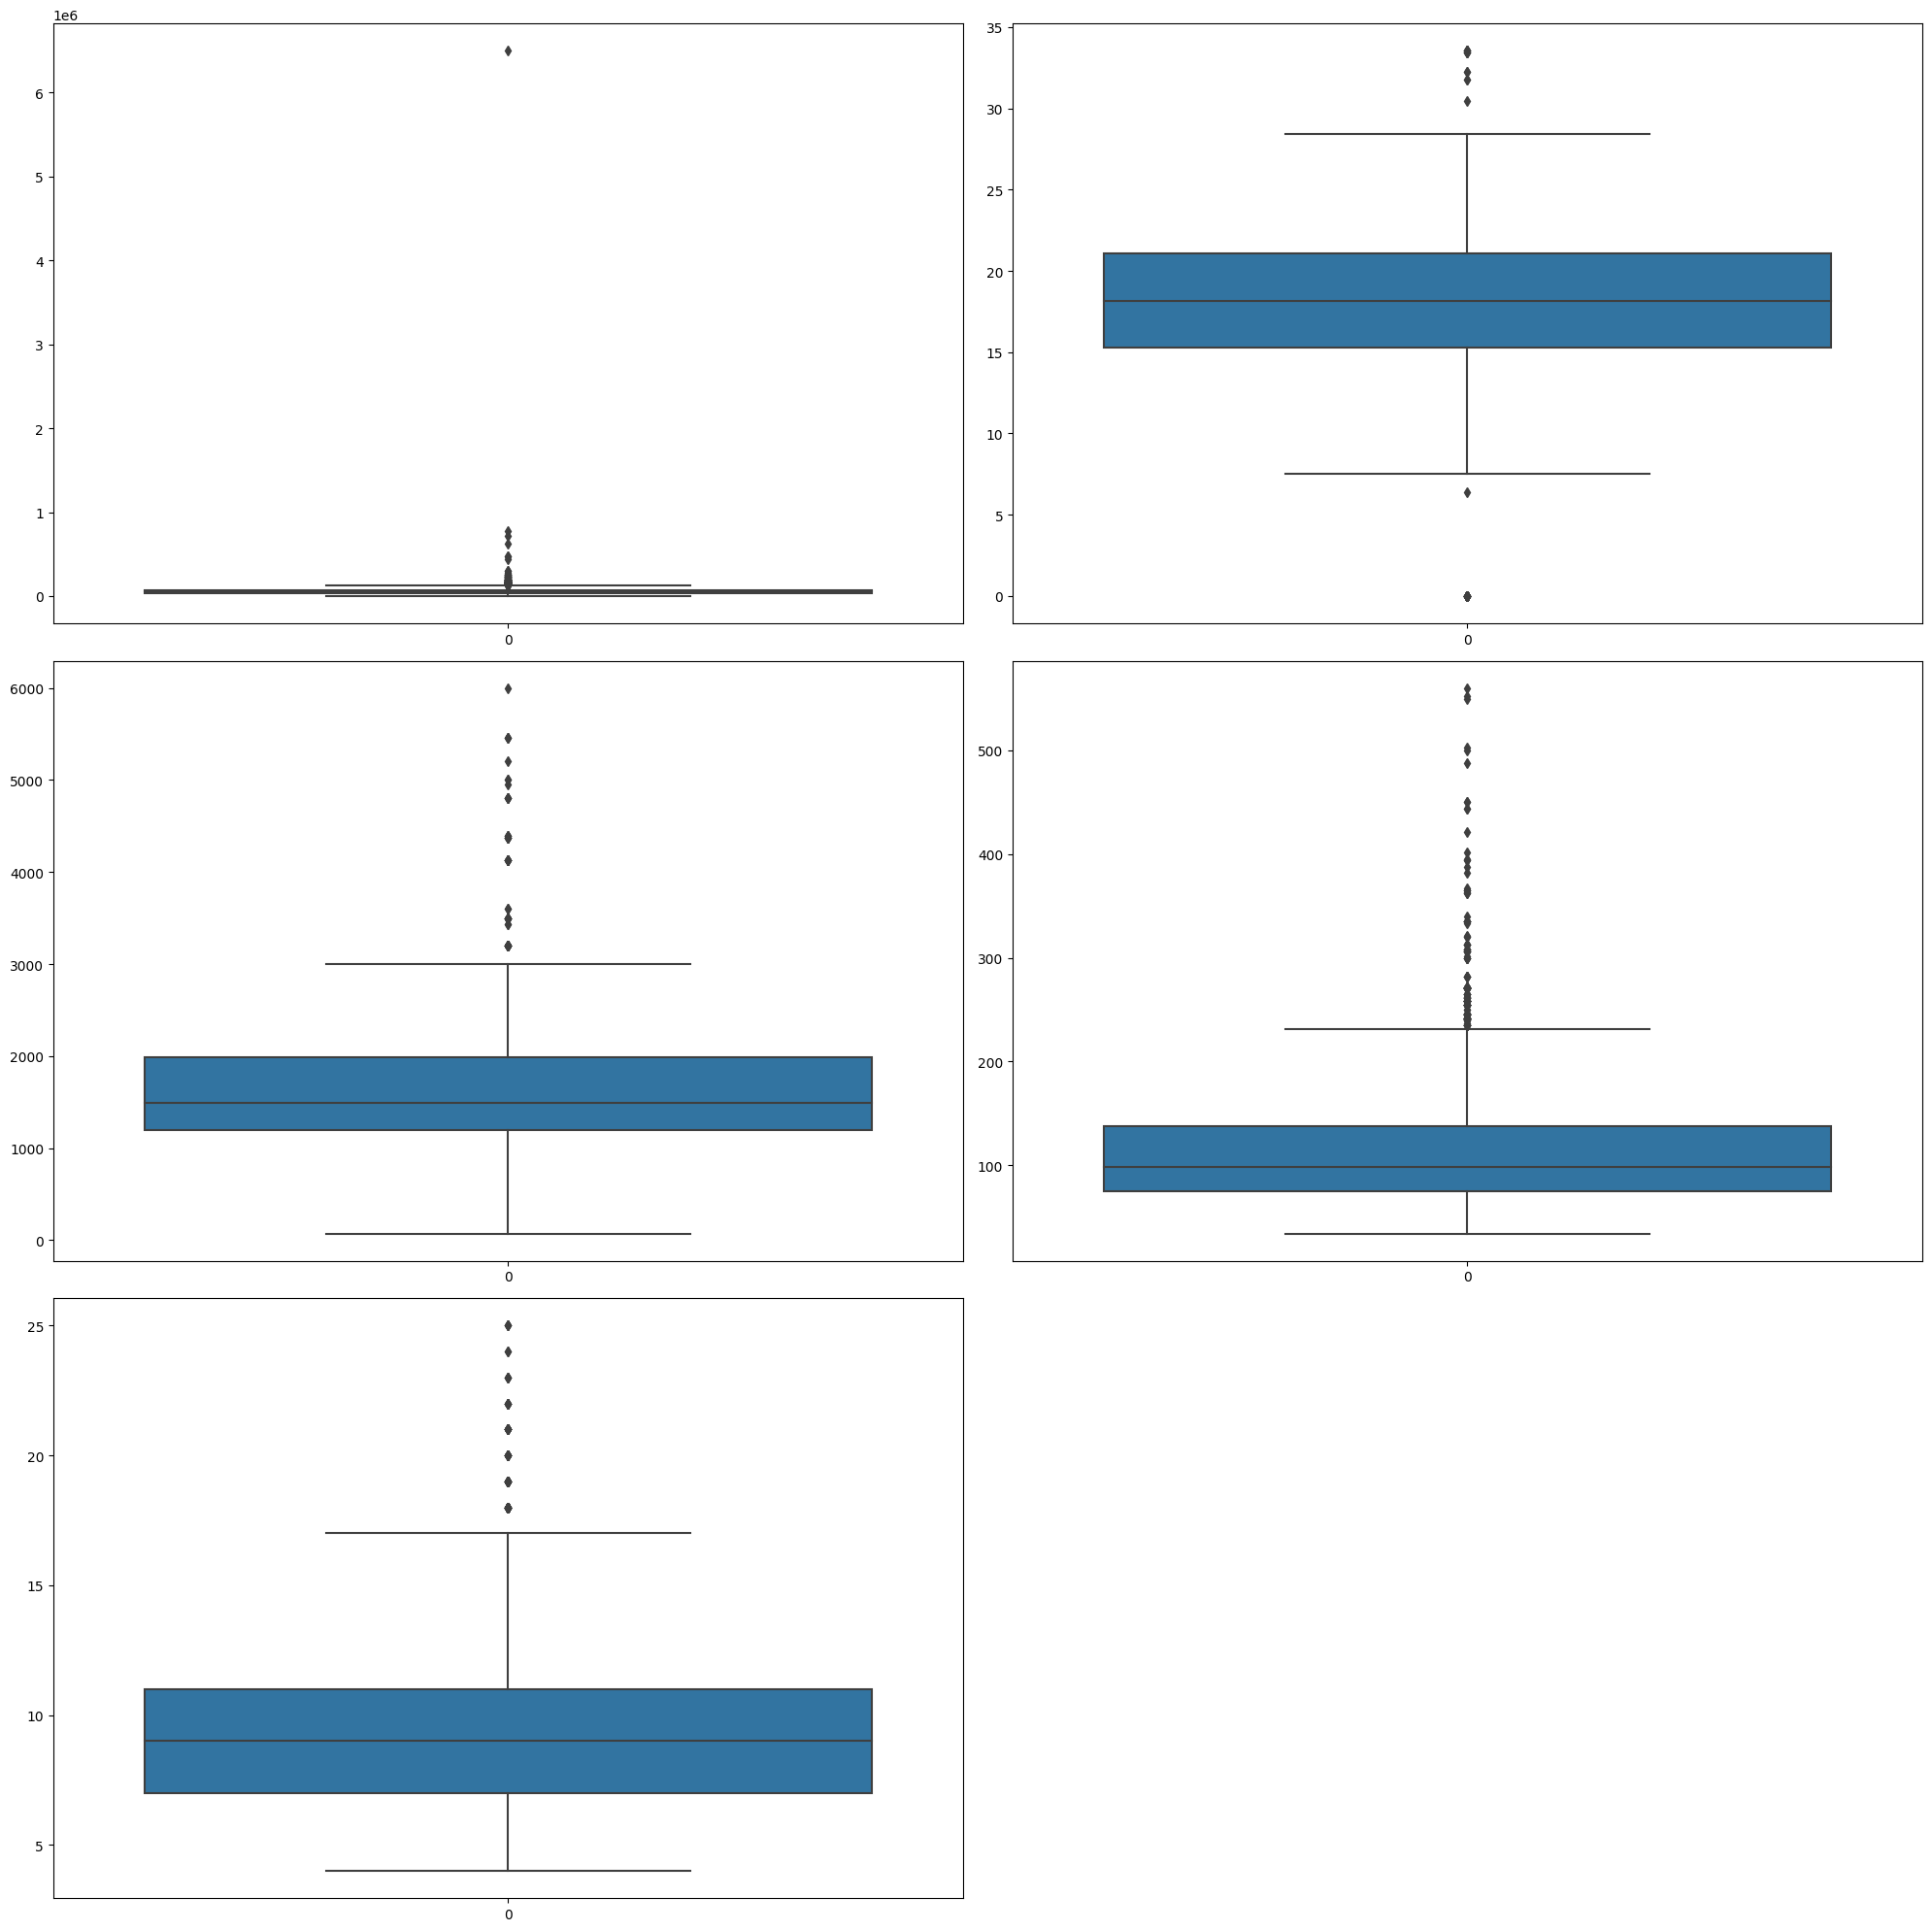

In [36]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cars.shape)

**Seems like Kilometers_Driven, Power, Engine have many outliers**

**Outliers Treatment**

In [37]:
Q1 = cars.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [38]:
lower_range

Year                  2006.00
Kilometers_Driven   -24586.25
Mileage                  6.50
Engine                  19.00
Power                  -19.65
Seats                    5.00
No. of Doors             4.00
Price                   -7.50
CarAge                   1.00
dtype: float64

In [39]:
upper_range

Year                   2022.00
Kilometers_Driven    131551.75
Mileage                  29.86
Engine                 3163.00
Power                   232.75
Seats                     5.00
No. of Doors              4.00
Price                    20.50
CarAge                   17.00
dtype: float64

In [40]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131603.50,131603.50,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']< 19.00,19.00,cars['Engine'])
cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15.25,15.25,cars['CarAge'])

Shape After Outliers Treatment (5959, 18)


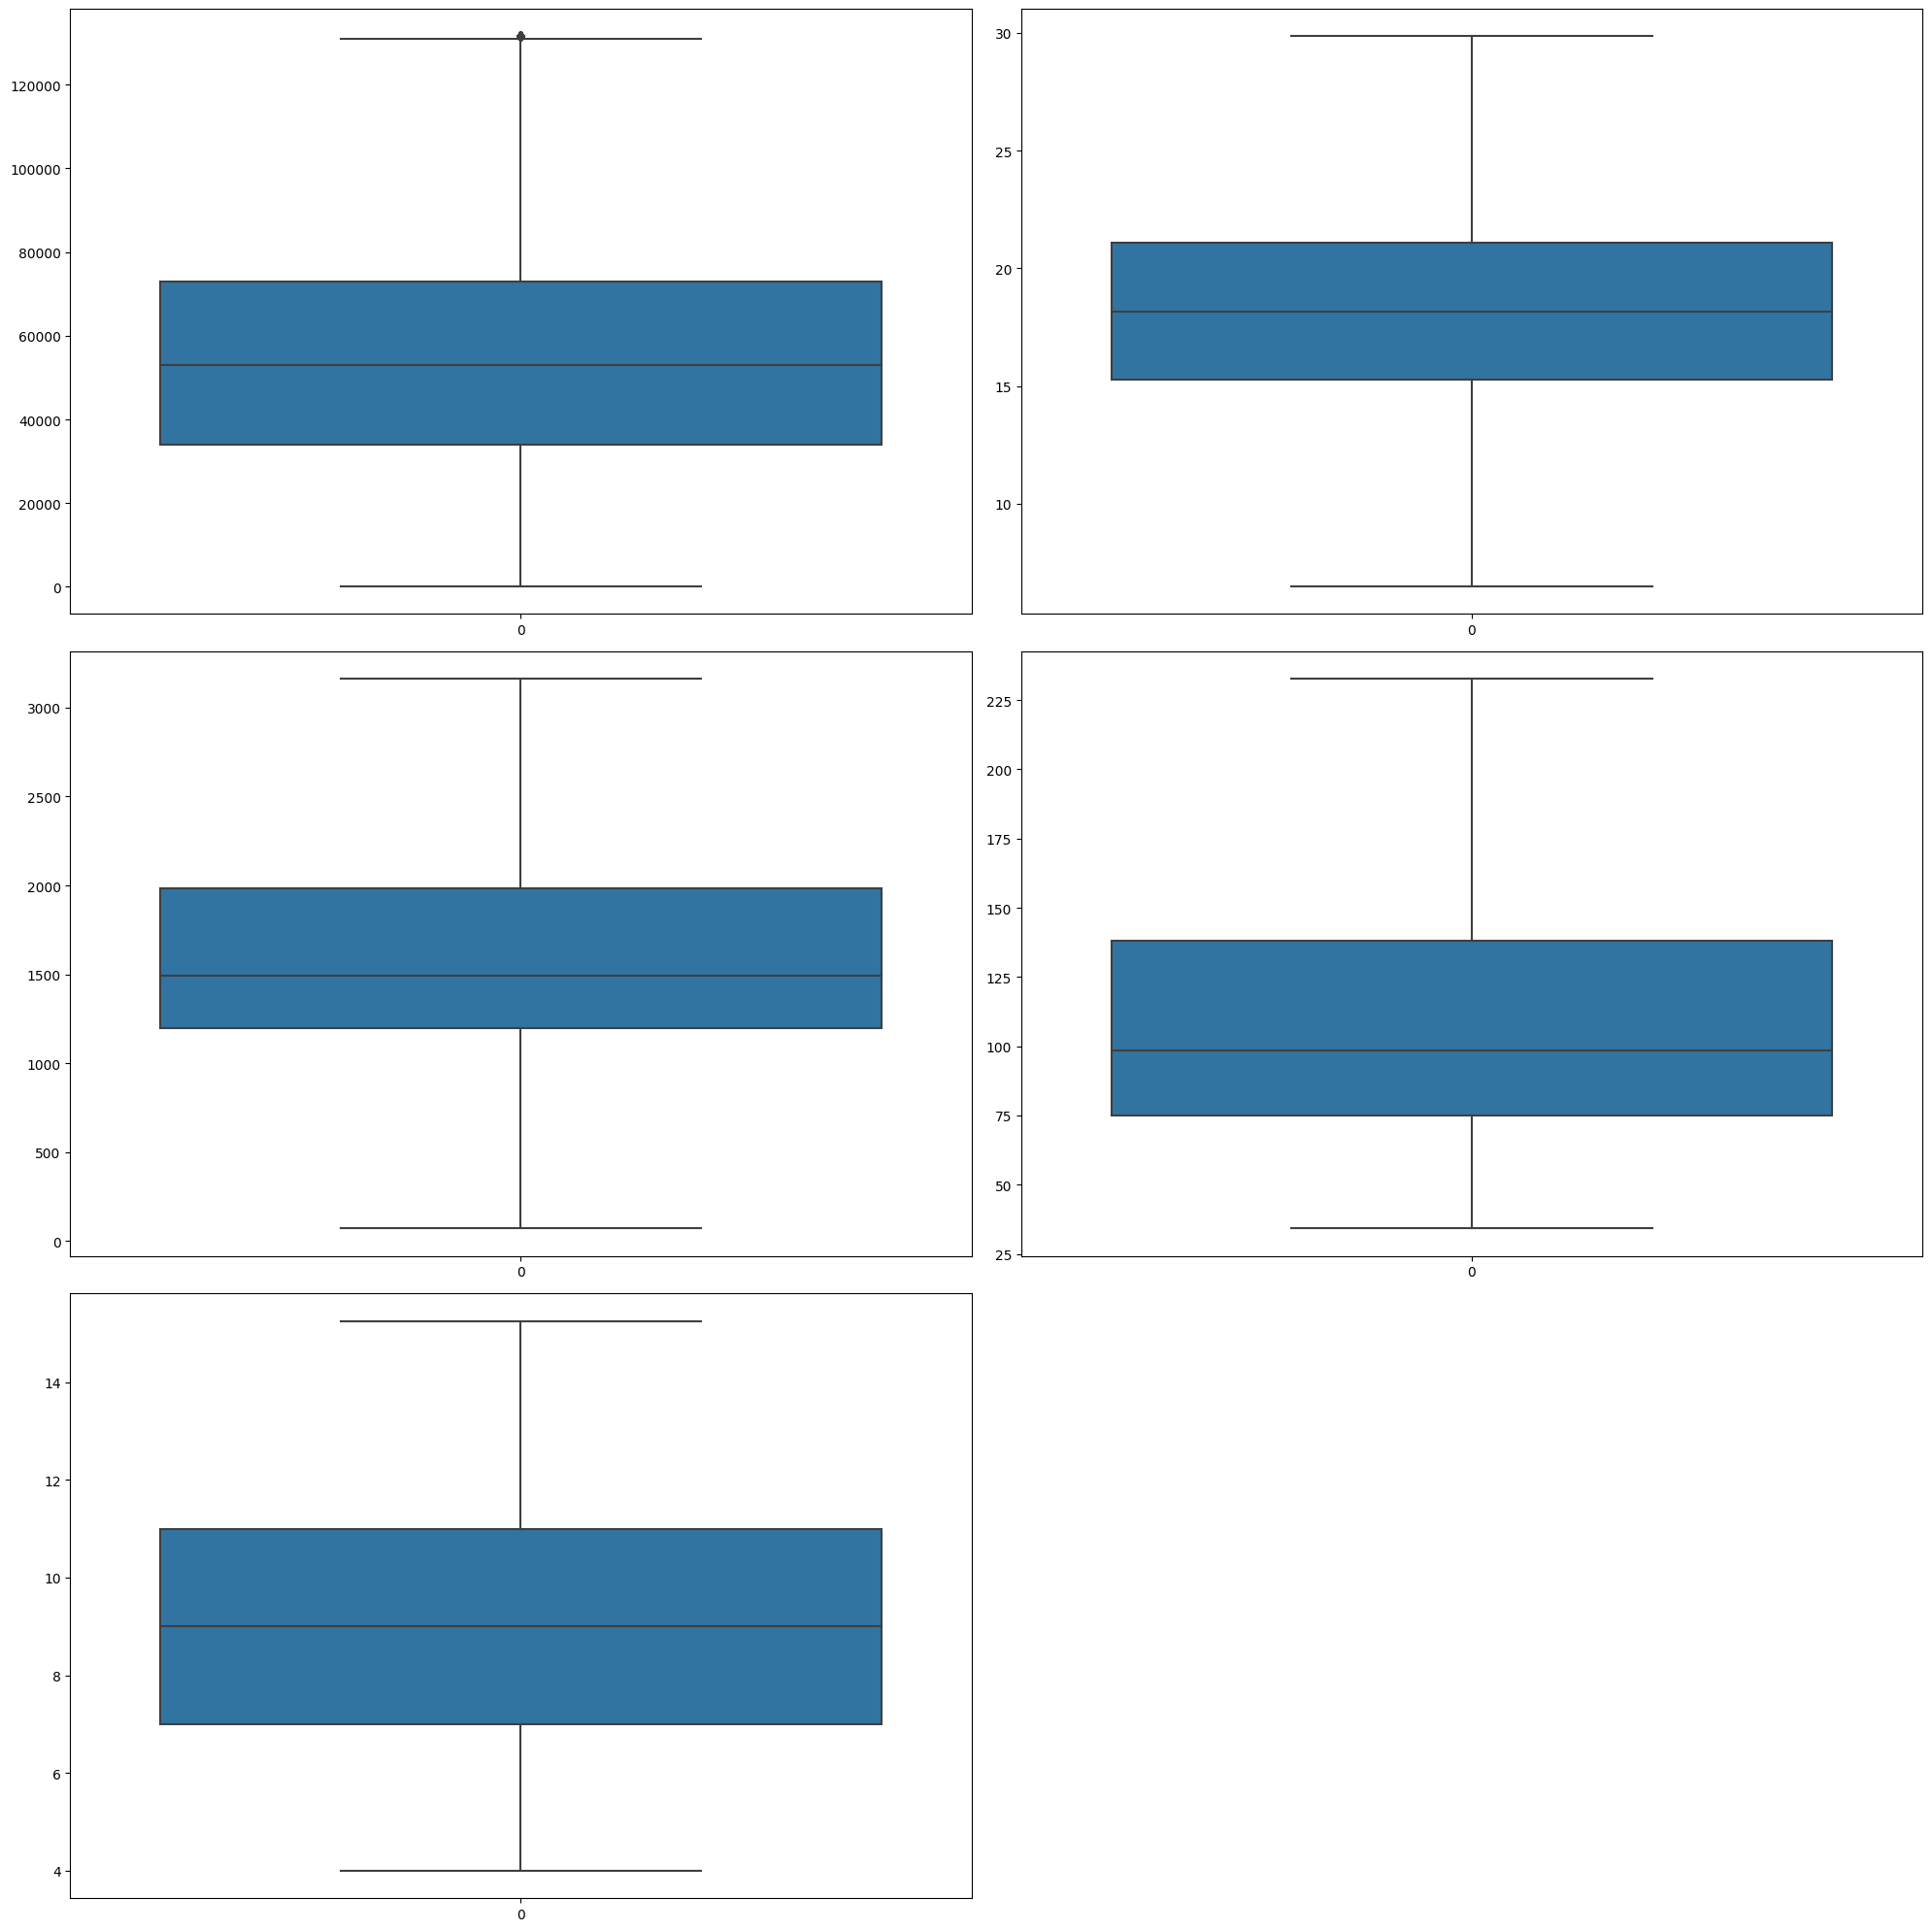

In [41]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',cars.shape)

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

In [42]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [43]:
cols

Index(['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'Cars_Category', 'CarAge'],
      dtype='object')

In [44]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(exclude=['object','category']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [45]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(cars[non_objects].iloc[:,:])

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [46]:
cars[non_objects]=imputer.transform(cars[non_objects])

**Impute the Object values using Mode**

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(cars[objects].iloc[:,:])

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [48]:
cars[objects]=imputer.transform(cars[objects])

In [49]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
Cars_Category        0
CarAge               0
dtype: int64

**There are no Null values now**

**Correlation Plot**

<AxesSubplot: >

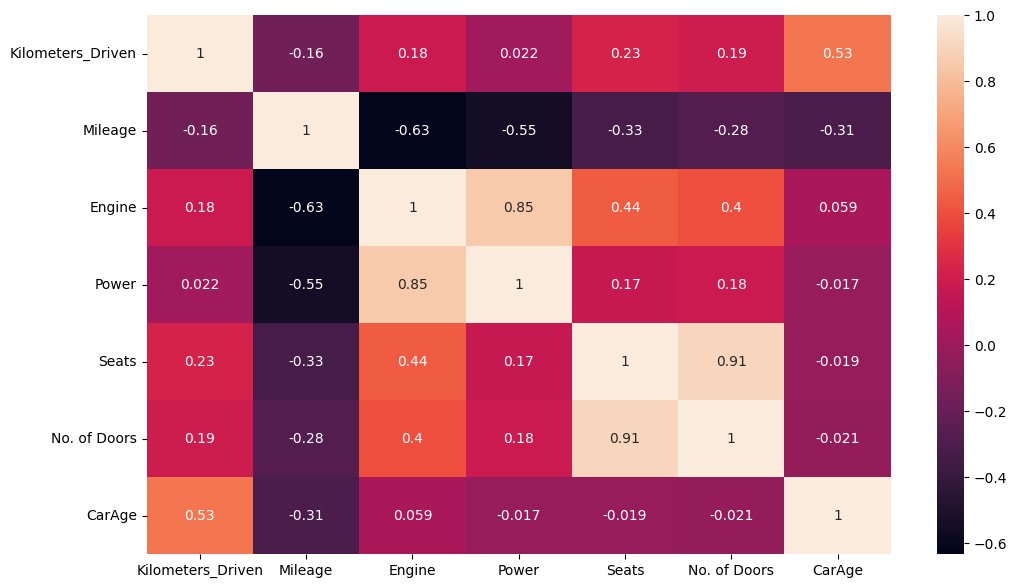

In [50]:
X=cars.drop(['Price','Name','Year'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and No. of Doors)

### **Encode the Data**

In [51]:
cars.select_dtypes(include='object').describe()


,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model,Cars_Category
count,5959,5959,5959,5959,5959,5959,5959,5959,5959
unique,212,11,5,2,4,3,29,208,2
top,Maruti Swift,Mumbai,Diesel,Manual,First,White,Maruti,Swift,Budget_Friendly
freq,343,792,3187,4250,4888,2126,1187,343,4520


In [52]:
cars["Cars_Category"]=cars["Cars_Category"].replace({"Budget_Friendly":1,"Not_Budget_Friendly":0})

There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [53]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes

        cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

In [54]:
cars.dtypes

Name                   int16
Location                int8
Year                 float64
Kilometers_Driven    float64
Fuel_Type               int8
Transmission            int8
Owner_Type              int8
Mileage              float64
Engine               float64
Power                float64
Colour                  int8
Seats                float64
No. of Doors         float64
Price                  int32
Brand                   int8
Model                  int16
Cars_Category           int8
CarAge               float64
dtype: object

**Split the Data**

In [55]:
x=cars.drop(['Price','Name','Year'],axis=1) # Year is transformed to CarAge
y=cars.Price

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

**Make 2 models using Decision Tree Regressor and Linear Regression and comparing the RMSE to find the best model**

- Check Train and Test RMSE
- Check Train and Test Scores

In [57]:
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()


models=[regression_model,dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # Computation of RMSE and R2 values 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          6.135898   6.101724        0.702456    0.706992
Decision Tree Regressor    0.018964   4.974656        0.999997    0.805240


**Looks like Decision Tree, is over-fitting because of the difference in values between train and test RMSE., Let's Grid Search to get the best parameters**

**You can also visualise the tree and see where to prune it and decide the max_depth and other parameters**
- Note : Hyperparameter tuning will be covered in coming sections 

**Grid Search on Decision Tree** (Pruning the tree)

In [58]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 30}


Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

In [59]:
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
   
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          6.135898   6.101724        0.702456    0.706992
Decision Tree Regressor    3.784989   4.957192        0.886780    0.806605


Text(0.5, 0, 'Decision Tree Feature Importance')

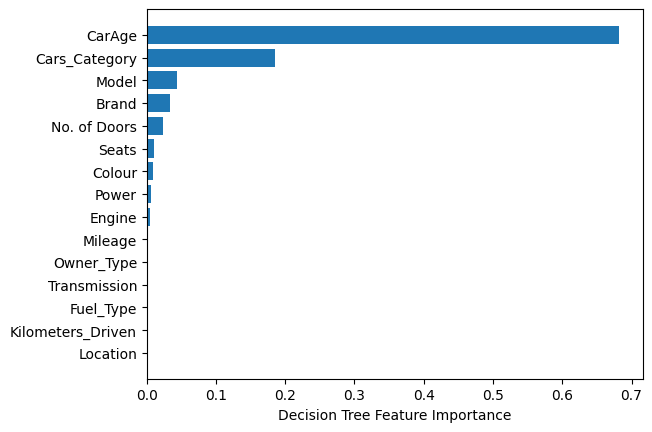

In [60]:
sorted_idx = dtr.feature_importances_.argsort()
plt.barh(x_train.columns,dtr.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")


Note :
    
<b/>So from the above we are clearly able to see 'CarAge' is the most important feature and it has a most effect over the price of the car , whereas 'Location' is the least important feature and thus has the least effect on price of the car.</b>

top 5 most important features are : <b/>['CarAge','Cars_Category','Model','Brand','No.of Doors']</b>

##### Food For Thought 

> **So what do you think which algo performed well here?**

Decision Tree or Linear Regression?

> **Which performance metric will you prefer here?**

RMSE or R Squared or MAPE?


**Now, Go on explore the dataset and do more feature engineering, EDA and find out the best way to get better R Squared and lower RMSE**

## ---------------------------------------------------------------------------------------------------------------------------

# Classification Case Study

### **Using the same dataset for all the customers having a budget of 10 lakh , build a best model to predict Price of any used car is  'Budget_Friendly' i.e. (having Price< 10 lakh) or 'Not_Budget_Friendly' .**



In [61]:
# Using the same dataframe
# The target variable is 'Cars_Category' as per the problem statement

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,96,10,2012.0,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6,15,160,1,11.0
1,108,7,2018.0,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8,16,25,1,5.0
2,103,1,2013.0,131603.5,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4,15,200,1,10.0
3,68,4,2014.0,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3,9,89,1,9.0
4,195,4,2011.0,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6,26,96,0,12.0


In [62]:
cars.info() # all object columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5960
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5959 non-null   int16  
 1   Location           5959 non-null   int8   
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5959 non-null   float64
 4   Fuel_Type          5959 non-null   int8   
 5   Transmission       5959 non-null   int8   
 6   Owner_Type         5959 non-null   int8   
 7   Mileage            5959 non-null   float64
 8   Engine             5959 non-null   float64
 9   Power              5959 non-null   float64
 10  Colour             5959 non-null   int8   
 11  Seats              5959 non-null   float64
 12  No. of Doors       5959 non-null   float64
 13  Price              5959 non-null   int32  
 14  Brand              5959 non-null   int8   
 15  Model              5959 non-null   int16  
 16  Cars_Category      5959 

In [63]:
cars.Cars_Category.value_counts(normalize=True) # percentage of two categories in target columns 

1    0.758517
0    0.241483
Name: Cars_Category, dtype: float64

### Split the data

In [64]:
x=cars.drop(['Cars_Category','Name','Year'],axis=1) # Name is transformed to Brand and model and Year is transformed to CarAge
y=cars.Cars_Category

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.30)

### **Make 3 models using Decision Tree Classifier , Logistic Regression and LDA and comparing the Accuracy to find the best model**

- Check Train and Test Accuracy to see that there is no huge Over/Under fitting 

In [66]:
dtc = DecisionTreeClassifier()
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(x_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.999760       0.940716
LDA                             0.925438       0.930089
Logistic Regression             0.910573       0.907159


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Looks like Decision Tree Classifier, is under-fitting because train accuracy > test accuracy ., Let's Grid Search to get the best parameters  or prune the tree**

#### Grid Search CV:

In [67]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 30}


In [68]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=30)
#Using best parameters in above 
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(x_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.973867       0.967002
LDA                             0.925438       0.930089
Logistic Regression             0.910573       0.907159


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Clearly now the underfitting of the model in Decison tree is reduced and Decison tree classifier results in the best accuracy score thus this model will be selected for classification 

### ROC AUC curve

AUC: 0.996


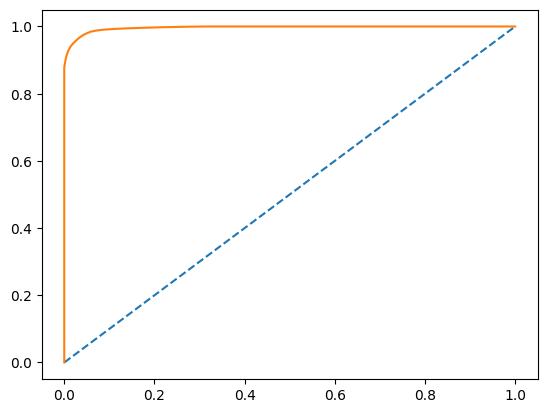

In [69]:
# predict probabilities
probs = dtc.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.996


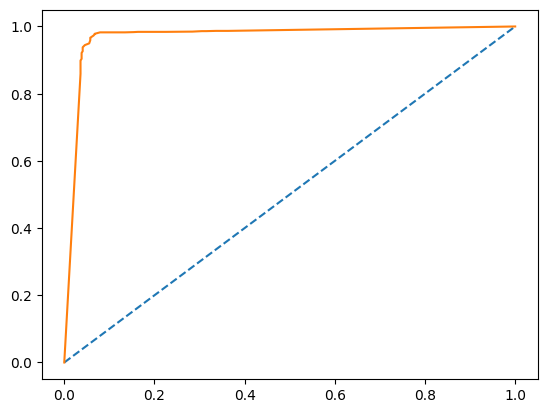

In [70]:
# predict probabilities
probs = dtc.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### ROC AUC Curve values for best model indicates that there is high level of seperatibility among the classes of the target variable 

###  Classification report 

In [71]:
print(classification_report(y_train, dtc.predict(x_train)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1023
           1       0.98      0.98      0.98      3148

    accuracy                           0.97      4171
   macro avg       0.97      0.96      0.96      4171
weighted avg       0.97      0.97      0.97      4171



In [72]:
print(classification_report(y_test, dtc.predict(x_test)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       416
           1       0.98      0.98      0.98      1372

    accuracy                           0.97      1788
   macro avg       0.95      0.96      0.95      1788
weighted avg       0.97      0.97      0.97      1788



### Inference on test data : 

For predicting price <10 lakh (Label 1: 'Budget Friendly' ):
   
   <b/>Precision (98%) – 98% of cars predicted are actually 'Budget Friendly' (price <10 lakh) out of all cars predicted to have (price <10 lakh).</b>
   
   <b/>Recall (98%) – Out of all the cars actually having (price <10 lakh), 98% of cars have been predicted correctly .</b>
    
For predicting price>= 10lakh (Label 0: 'Not Budget Friendly' ):

   <b/>Precision (93%) – 93% of cars predicted are actually 'Not Budget Friendly' (price >=10 lakh) oout of all cars predicted to have (price >=10 lakh).</b>
   
   <b/>Recall (93%) – Out of all the cars actually having (price >=10 lakh), 93% of cars have been predicted correctly .</b></b>
 

### Overall accuracy of the model – 97 % of total predictions are correct

##### Accuracy, AUC, Precision and Recall for test data is almost inline with training data. 
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification



                                               Happy Learning